1. train test split
2. fit use 3 models
3. get confusion matix and classification report to test models
4. hyperparameter optimization using grid search


In [58]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
import sys

import warnings
warnings.filterwarnings('ignore')

## Import data
Once all the documents have been read, we will only import those that contain the data to be studied: ticdata2000.txt, ticeval2000.txt, tictgts200.txt.

In [14]:
training_data = pd.read_csv('ticdata2000.txt', sep='\t', header=None)
testing_data = pd.read_csv('ticeval2000.txt', sep='\t', header=None)
targets_data = pd.read_csv('tictgts2000.txt', sep='\t', header=None)

In [15]:
training_data.head()

,0,1,2,3,4,5,6,7,8,9,...,76,77,78,79,80,81,82,83,84,85
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [21]:
training_data.shape

(5822, 86)

In [18]:
targets_data.shape

(4000, 1)

In [19]:
testing_data.shape

(4000, 85)

##  We check the rows and columns of the different dataframes

In [3]:
## check the training data.
print("El DF training_data contiene " + str(training_data.shape[0]) +" filas y " + str(training_data.shape[1]) + " columnas")

El DF training_data contiene 5822 filas y 86 columnas


In [4]:
## check the testing data.
print("El DF testing_data contiene " + str(testing_data.shape[0]) +" filas y " + str(testing_data.shape[1]) + " columnas")

El DF testing_data contiene 4000 filas y 85 columnas


In [5]:
## check the test targets.
print("El DF targets_data contiene " + str(targets_data.shape[0]) +" filas y " + str(targets_data.shape[1]) + " columnas")

El DF targets_data contiene 4000 filas y 1 columnas


## Inclusion and naming of variables
In this section we will join the data from testing_data with those from targets_data in order to unify all the data in a single dataframe and facilitate the transformation of the set if necessary.



In [6]:
## bind the target variable to the testing_data dataframe. Assigning the new dataframe the name : 'testing_data_with_targets'.
testing_data_with_targets = pd.concat([testing_data, targets_data], axis=1)

In [7]:
## assign the name to the variables of 'testing_data_with_targets'.
testing_data_with_targets.columns = ['MOSTYPE','MAANTHUI','MGEMOMV','MGEMLEEF','MOSHOOFD', 'MGODRK', 'MGODPR','MGODOV','MGODGE','MRELGE', 'MRELSA',
                                    'MRELOV','MFALLEEN','MFGEKIND','MFWEKIND','MOPLHOOG','MOPLMIDD','MOPLLAAG','MBERHOOG','MBERZELF','MBERBOER',
                                    'MBERMIDD','MBERARBG','MBERARBO','MSKA','MSKB1','MSKB2','MSKC','MSKD','MHHUUR','MHKOOP','MAUT1','MAUT2',
                                    'MAUT0','MZFONDS','MZPART','MINKM30','MINK3045','MINK4575','MINK7512','MINK123M','MINKGEM','MKOOPKLA','PWAPART',
                                    'PWABEDR','PWALAND','PPERSAUT','PBESAUT','PMOTSCO','PVRAAUT','PAANHANG','PTRACTOR','PWERKT','PBROM','PLEVEN',
                                    'PPERSONG','PGEZONG','PWAOREG','PBRAND','PZEILPL','PPLEZIER','PFIETS','PINBOED','PBYSTAND','AWAPART','AWABEDR',
                                    'AWALAND','APERSAUT','ABESAUT','AMOTSCO','AVRAAUT','AAANHANG','ATRACTOR','AWERKT','ABROM','ALEVEN','APERSONG',
                                    'AGEZONG','AWAOREG','ABRAND','AZEILPL','APLEZIER','AFIETS','AINBOED','ABYSTAND','CARAVAN']

In [8]:
## Check that names have been added.
testing_data_with_targets.head()


,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,4,2,8,0,6,0,3,5,...,0,0,0,1,0,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,...,0,0,0,1,0,0,0,0,0,1
2,39,1,3,3,9,1,4,2,3,5,...,0,0,0,1,0,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,...,0,0,0,1,0,0,0,0,0,0


We proceed to add the name of the columns in the training_data dataframe.

In [9]:
training_data.columns =['MOSTYPE','MAANTHUI','MGEMOMV','MGEMLEEF','MOSHOOFD', 'MGODRK', 'MGODPR','MGODOV','MGODGE','MRELGE', 'MRELSA',
                        'MRELOV','MFALLEEN','MFGEKIND','MFWEKIND','MOPLHOOG','MOPLMIDD','MOPLLAAG','MBERHOOG','MBERZELF','MBERBOER',
                        'MBERMIDD','MBERARBG','MBERARBO','MSKA','MSKB1','MSKB2','MSKC','MSKD','MHHUUR','MHKOOP','MAUT1','MAUT2',
                        'MAUT0','MZFONDS','MZPART','MINKM30','MINK3045','MINK4575','MINK7512','MINK123M','MINKGEM','MKOOPKLA','PWAPART',
                        'PWABEDR','PWALAND','PPERSAUT','PBESAUT','PMOTSCO','PVRAAUT','PAANHANG','PTRACTOR','PWERKT','PBROM','PLEVEN',
                        'PPERSONG','PGEZONG','PWAOREG','PBRAND','PZEILPL','PPLEZIER','PFIETS','PINBOED','PBYSTAND','AWAPART','AWABEDR',
                        'AWALAND','APERSAUT','ABESAUT','AMOTSCO','AVRAAUT','AAANHANG','ATRACTOR','AWERKT','ABROM','ALEVEN','APERSONG',
                        'AGEZONG','AWAOREG','ABRAND','AZEILPL','APLEZIER','AFIETS','AINBOED','ABYSTAND','CARAVAN']

Since we have two dataframes, one for training and one for testing, we are going to add a new column to differentiate between them in the unified dataset.


In [10]:
testing_data_with_targets['test_set'] = 1
training_data['test_set'] = 0

Once the names of the variables have been assigned and differentiated between training and test, we proceed to join the two tables in the dataframe full_dataset and check their rows and columns.


In [11]:
full_dataset= pd.concat([training_data, testing_data_with_targets], axis=0)

In [12]:
full_dataset.reset_index(drop=True, inplace=True)

In [13]:
print("El DF targets_data contiene " + str(full_dataset.shape[0]) +" filas y " + str(full_dataset.shape[1]) + " columnas")
full_dataset.head()

El DF targets_data contiene 9822 filas y 87 columnas


,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN,test_set
0,33,1,3,2,8,0,5,1,3,7,...,0,0,1,0,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,1,0,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,1,0,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,1,0,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,1,0,0,0,0,0,0,0


## Data Type Analysis
We analyze the type of data that forms each variable


In [14]:
## check the number of data that there are of different types.
print(full_dataset.dtypes.sort_values().to_frame('feature_type').groupby(by = 'feature_type').size().to_frame('count').reset_index())

full_dataset.dtypes 

  feature_type  count
0        int64     87


MOSTYPE     int64
MAANTHUI    int64
MGEMOMV     int64
MGEMLEEF    int64
MOSHOOFD    int64
            ...  
AFIETS      int64
AINBOED     int64
ABYSTAND    int64
CARAVAN     int64
test_set    int64
Length: 87, dtype: object

## Target Variable
The objective variable of the dataset is the CARAVAN value, which indicates whether or not the clients will take out a motorhome policy. The variable takes a value of 1 in the case of contracting the policy and 0 in the case of not contracting it.


In [15]:
## check that the unique values of caravan are 0 and 1.
print(full_dataset.CARAVAN.unique())

[0 1]


In [1]:
# We select the training values to see the proportion of the objective variable.
#classes_overview(df = training_data, obj_val = 'CARAVAN')


## EDA Analysis

In [17]:
## # Cambio de nombre de las variables.
new_names = ['customer_subtype','num_houses','household_size','avg_age','customer_maintype', 'religion_catholic', 'religion_protestant','religion_other','religion_no','relation_married', 'relation_living_together',
                                    'relation_other','relation_singles','children_no','children_yes','education_highlev','education_medlev','education_lowlev','status_high','status_entrepreneur','status_farmer',
                                    'status_middle_management','labourers_skill','labourers_unskill','social_class_a','social_class_b1','social_class_b2','social_class_c','social_class_d','home_rented',
                                    'home_owners','car_1','car_2','car_no','health_national','health_private','income_-30k','income_30_45','income_45_75','income_75_122','income_+123','income_avg',
                                    'purchase_power_class','contrib_third_party_insurance','contrib_third_party_firms','contrib_third_party_agriculture','contrib_car_policies','contrib_van_policies','contrib_motorcycle_policies',
                                    'contrib_lorry_policies','contrib_trailer_policies','contrib_tractor_policies','contrib_agric_machines_policies','contrib_moped_policies','contrib_life_insurance','contrib_priv_accident_insurance','contrib_family_accident_insurance',
                                    'contrib_disability_insurance','contrib_fire_policies','contrib_surfboard_policies','contrib_boat_policies','contrib_bycycle_policies','contrib_property_policies','contrib_socialsec_policies','num_private_third_party_insurance',
                                    'num_third_party_firms','num_third_party_agric','num_car','num_van','num_motorcycle','num_lorry','num_trailer','num_tractor','num_agric_machines','num_moped','num_life_insurances',
                                    'num_private_accident_insurances','num_fam_accident_insurances','num_disability_insurances','num_fire','num_surfboard','num_boat','num_bycyle','num_property_insurance','num_socsec_insurance','num_mobile_home', 'test_set']

# Check that the number of entered names coincide with the number of original names.
print(len(full_dataset.columns) == len(new_names))

## Let's replace the names.
full_dataset.columns = new_names

## Let's show part of the table to check the new names
full_dataset.head()

True


,customer_subtype,num_houses,household_size,avg_age,customer_maintype,religion_catholic,religion_protestant,religion_other,religion_no,relation_married,...,num_fam_accident_insurances,num_disability_insurances,num_fire,num_surfboard,num_boat,num_bycyle,num_property_insurance,num_socsec_insurance,num_mobile_home,test_set
0,33,1,3,2,8,0,5,1,3,7,...,0,0,1,0,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,1,0,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,1,0,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,1,0,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,1,0,0,0,0,0,0,0


In [18]:
## Eliminate the columns mentioned.

columnas_a_borrar = ['religion_catholic', 'religion_protestant', 'religion_protestant', 'religion_other','religion_no' ] 

full_dataset = full_dataset.drop(columnas_a_borrar, axis=1)

In [19]:
## Check that the columns have been removed.
full_dataset.columns.to_list()

['customer_subtype',
 'num_houses',
 'household_size',
 'avg_age',
 'customer_maintype',
 'relation_married',
 'relation_living_together',
 'relation_other',
 'relation_singles',
 'children_no',
 'children_yes',
 'education_highlev',
 'education_medlev',
 'education_lowlev',
 'status_high',
 'status_entrepreneur',
 'status_farmer',
 'status_middle_management',
 'labourers_skill',
 'labourers_unskill',
 'social_class_a',
 'social_class_b1',
 'social_class_b2',
 'social_class_c',
 'social_class_d',
 'home_rented',
 'home_owners',
 'car_1',
 'car_2',
 'car_no',
 'health_national',
 'health_private',
 'income_-30k',
 'income_30_45',
 'income_45_75',
 'income_75_122',
 'income_+123',
 'income_avg',
 'purchase_power_class',
 'contrib_third_party_insurance',
 'contrib_third_party_firms',
 'contrib_third_party_agriculture',
 'contrib_car_policies',
 'contrib_van_policies',
 'contrib_motorcycle_policies',
 'contrib_lorry_policies',
 'contrib_trailer_policies',
 'contrib_tractor_policies',
 'con

In [20]:
training_dataset = full_dataset[full_dataset['test_set']== 0]

## Duplicate value analysis
As part of the EDA, we are going to proceed to check if there are duplicate values, and if they exist, analyze them and make a decision.

In [21]:
## Create a DF with the existing duplicates in the training selection.

duplicados = training_dataset[training_dataset.duplicated()]

len(duplicados)

602

We observe that there are 602 duplicate records.

However, since the dictionary mentions that the sociodemographic values ​​are the same for those people who live in the same zip code, it may be possible that there are people from the same neighborhood with the same number of policies and contributions. It is for this reason that we are not going to discard the data and we are going to continue working with it.

## Analysis of null values
We proceed to check if within our variables there is a null value

In [22]:
# Creamos DF with recount of null values.
null_df = training_dataset.isnull().sum().reset_index()
null_df.columns = ['column_name', 'NAs']

## Select those variables with 1 or more null values
null_df[null_df.NAs > 0]

,column_name,NAs


We observe that there are NO null values ​​in this DF, so it is not necessary to make new data transformations.



## Categorical variables
We create a DF with only the categorical variables to draw their graphs based on the objective variable and analyze them.

In [23]:
## Create a DF only with the categorical variables for the analysis called 'categorical_dataset'.

categoric_dataset = training_dataset[['avg_age','customer_maintype','relation_married', 'relation_living_together',
                                    'relation_other','relation_singles','children_no','children_yes','education_highlev','education_medlev','education_lowlev','status_high','status_entrepreneur','status_farmer',
                                    'status_middle_management','labourers_skill','labourers_unskill','social_class_a','social_class_b1','social_class_b2','social_class_c','social_class_d','home_rented',
                                    'home_owners','car_1','car_2','car_no','health_national','health_private','income_-30k','income_30_45','income_45_75','income_75_122','income_+123','income_avg',
                                    'purchase_power_class','contrib_third_party_insurance','contrib_third_party_firms','contrib_third_party_agriculture','contrib_car_policies','contrib_van_policies','contrib_motorcycle_policies',
                                    'contrib_lorry_policies','contrib_trailer_policies','contrib_tractor_policies','contrib_agric_machines_policies','contrib_moped_policies','contrib_life_insurance','contrib_priv_accident_insurance','contrib_family_accident_insurance',
                                    'contrib_disability_insurance','contrib_fire_policies','contrib_surfboard_policies','contrib_boat_policies','contrib_bycycle_policies','contrib_property_policies','contrib_socialsec_policies','customer_subtype', 'num_mobile_home']]

# Comprobamos el DF creado.
categoric_dataset.head()

,avg_age,customer_maintype,relation_married,relation_living_together,relation_other,relation_singles,children_no,children_yes,education_highlev,education_medlev,...,contrib_family_accident_insurance,contrib_disability_insurance,contrib_fire_policies,contrib_surfboard_policies,contrib_boat_policies,contrib_bycycle_policies,contrib_property_policies,contrib_socialsec_policies,customer_subtype,num_mobile_home
0,2,8,7,0,2,1,2,6,1,2,...,0,0,5,0,0,0,0,0,33,0
1,2,8,6,2,2,0,4,5,0,5,...,0,0,2,0,0,0,0,0,37,0
2,2,8,3,2,4,4,4,2,0,5,...,0,0,2,0,0,0,0,0,37,0
3,3,3,5,2,2,2,3,4,3,4,...,0,0,2,0,0,0,0,0,9,0
4,2,10,7,1,2,2,4,4,5,4,...,0,0,6,0,0,0,0,0,40,0


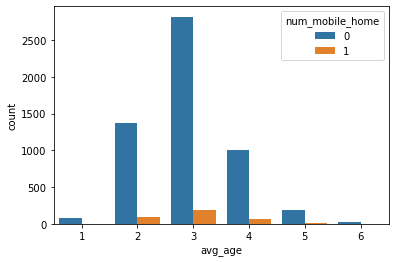

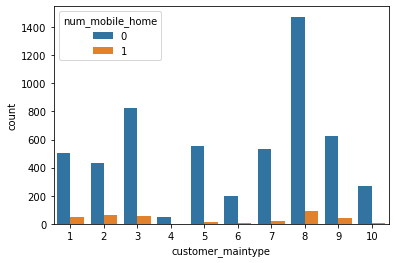

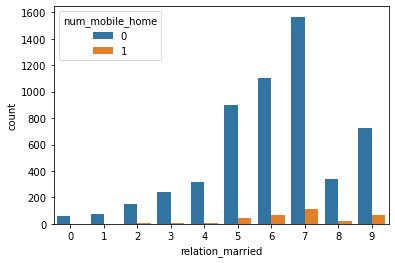

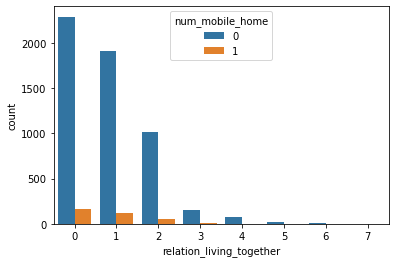

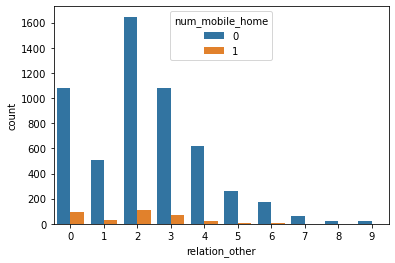

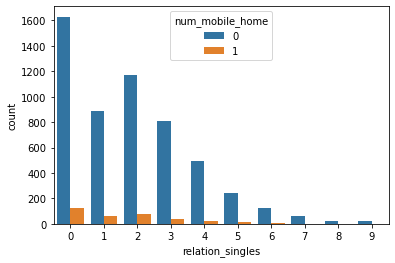

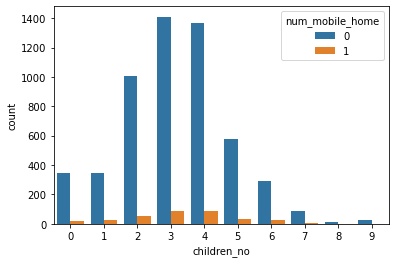

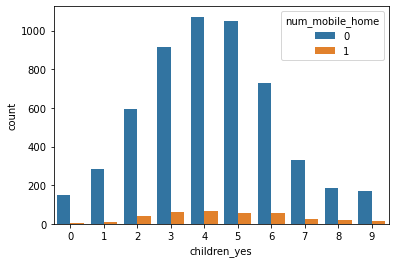

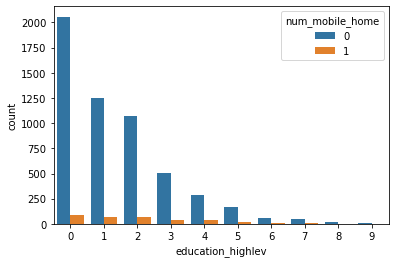

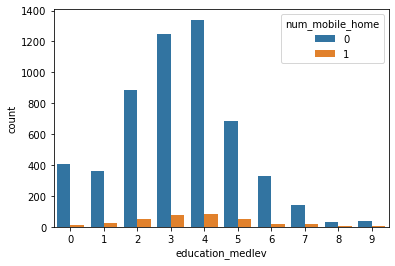

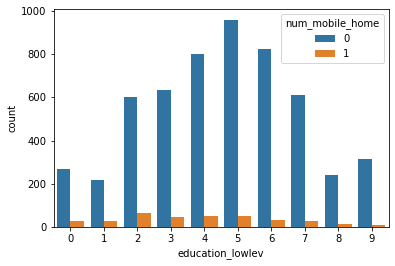

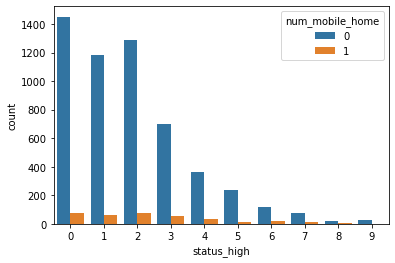

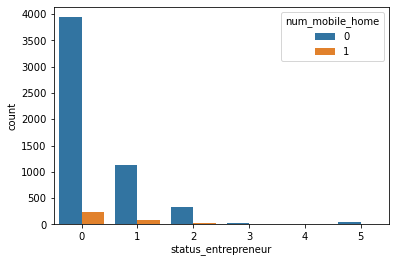

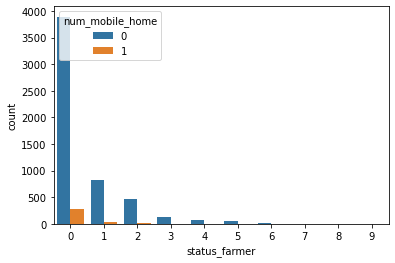

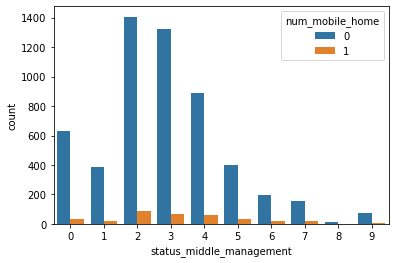

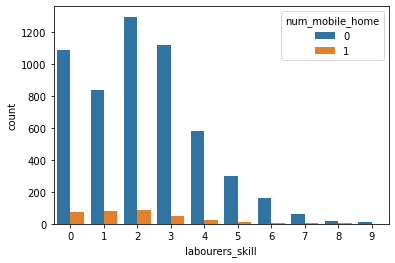

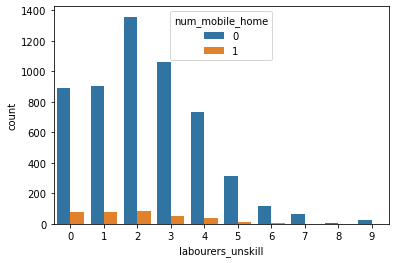

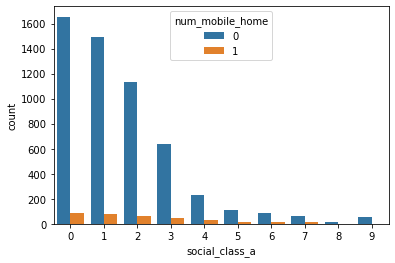

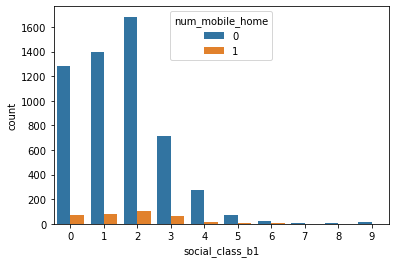

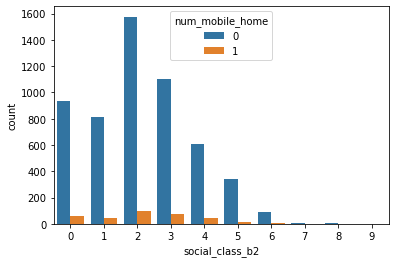

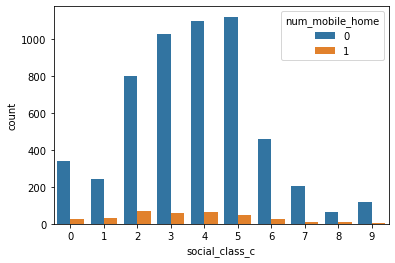

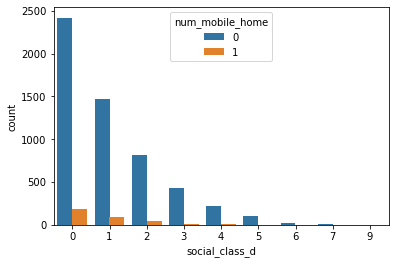

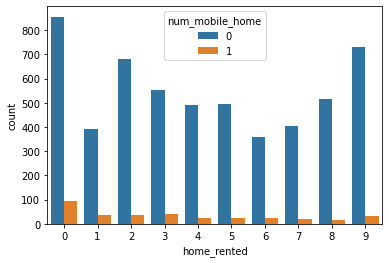

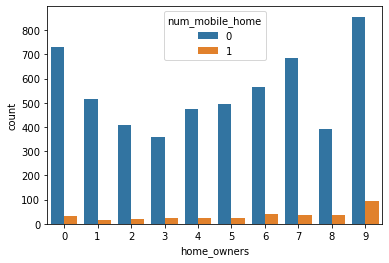

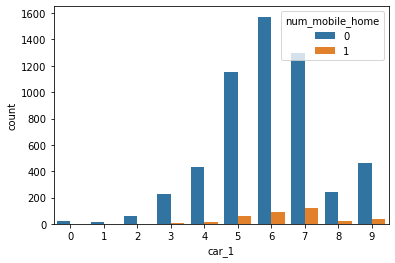

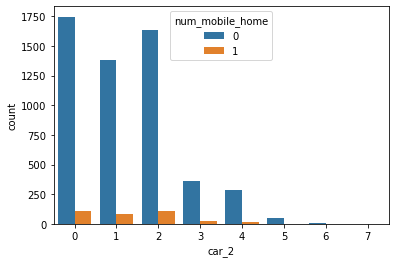

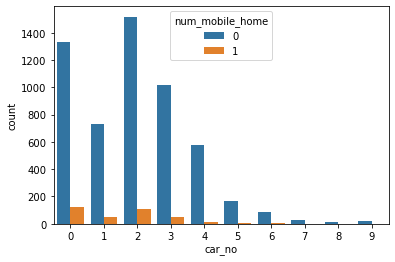

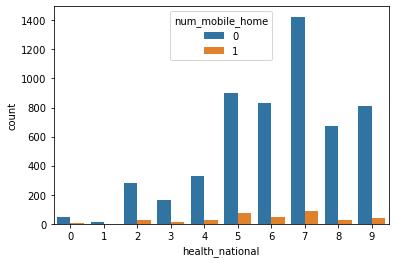

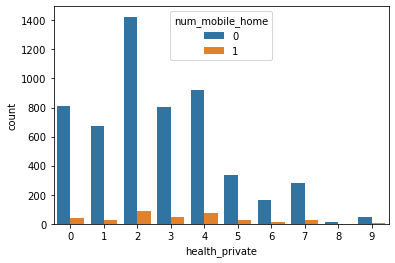

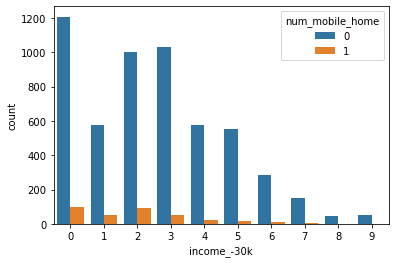

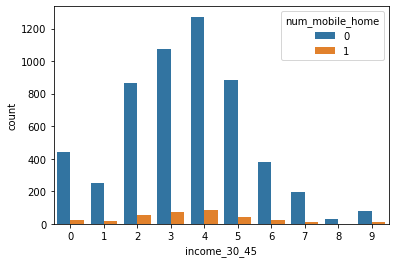

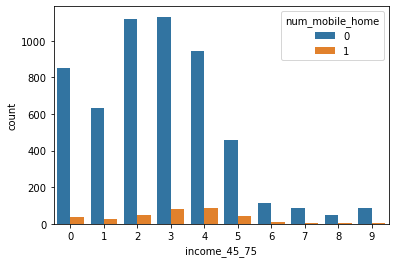

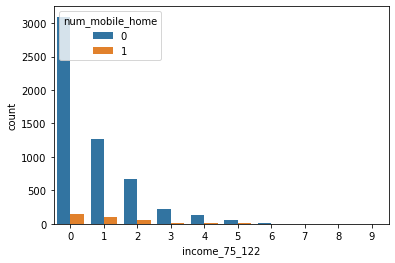

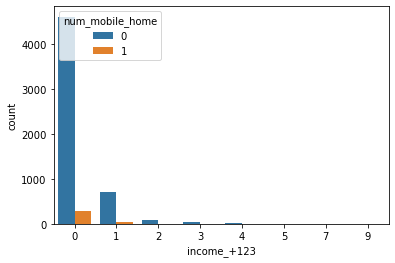

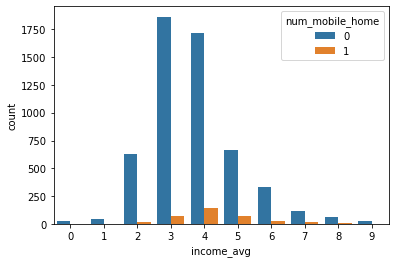

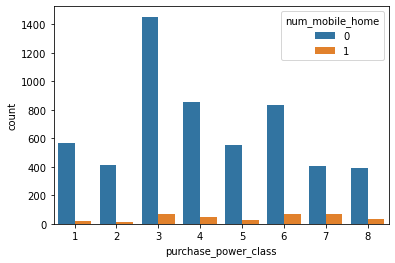

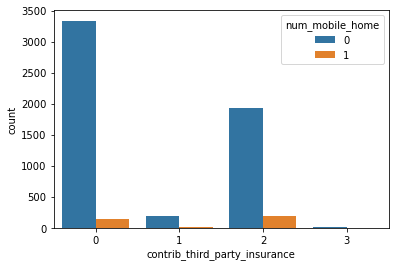

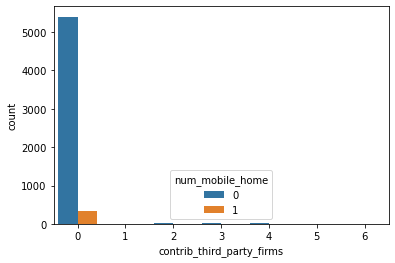

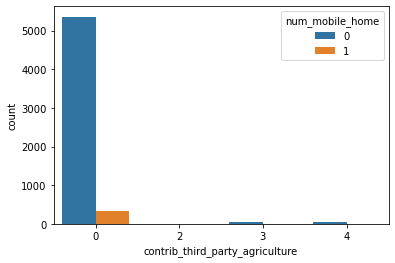

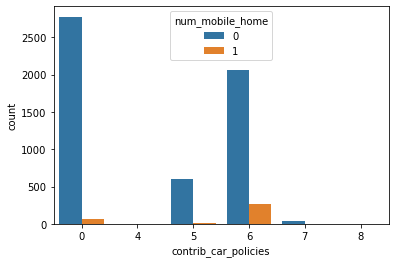

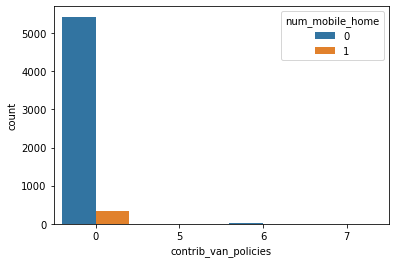

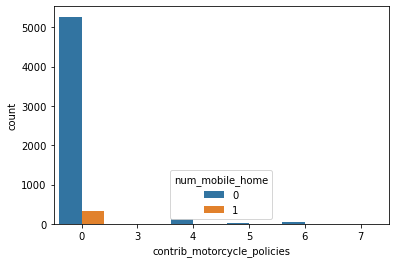

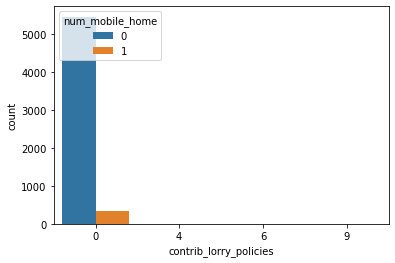

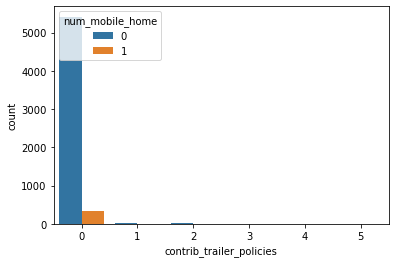

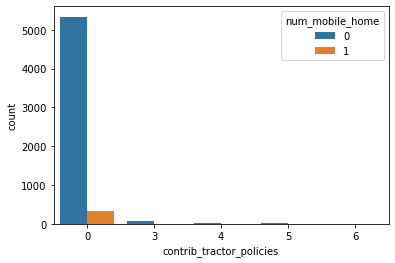

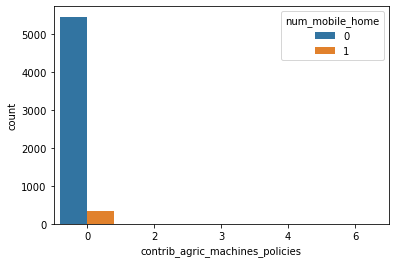

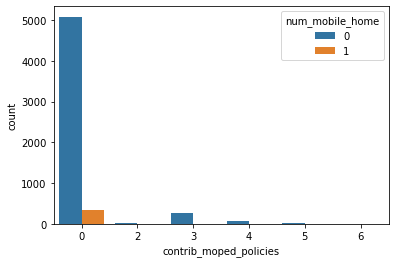

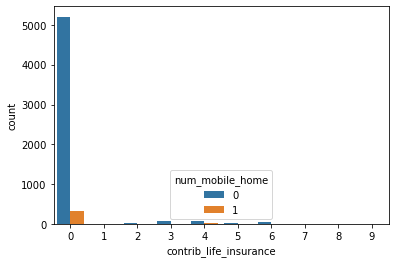

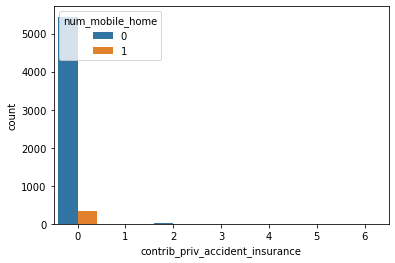

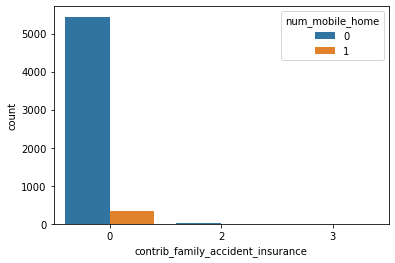

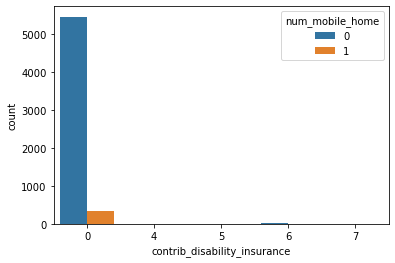

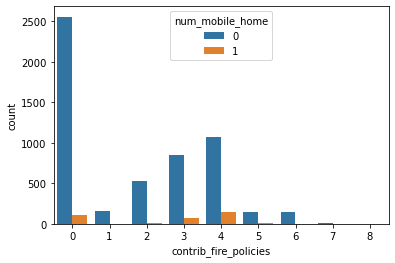

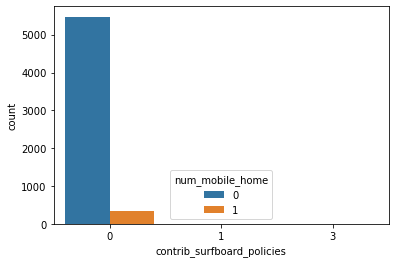

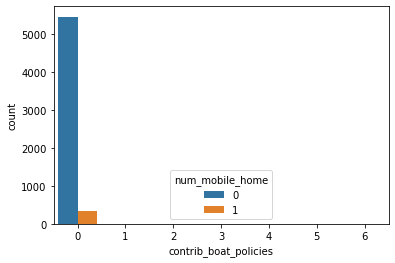

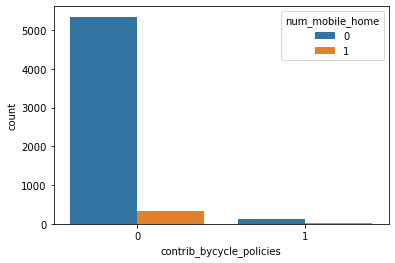

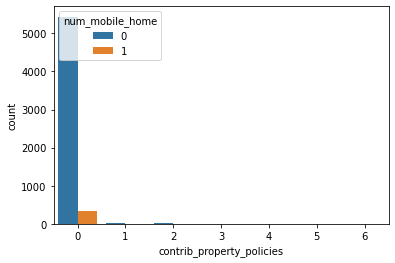

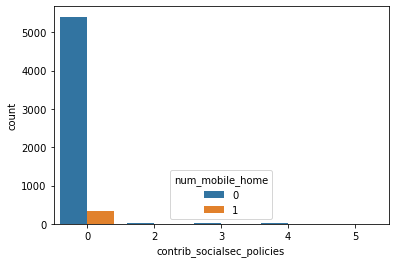

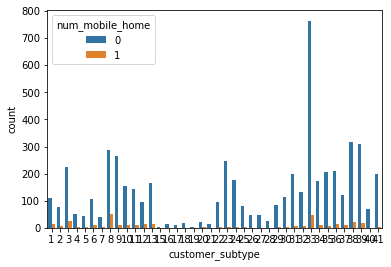

In [34]:
#Silenciamos los warnings.
warnings.filterwarnings("ignore")

# For each column different from the objective variable, graph its distribution on the left,
# to the right as a function of the target variable
for i in categoric_dataset.columns:
    if i != "num_mobile_home":
        plot_feature(categoric_dataset,i,"num_mobile_home")

In [33]:
def plot_feature(data, feature, target):
    
    sns.countplot(data=data, x=feature, hue=target)
    plt.show()

## Numerical Variables

In [35]:
## Creamos DF with the numeric variables.

numeric_dataset = training_dataset[['num_houses', 'household_size','num_private_third_party_insurance','num_third_party_firms','num_third_party_agric','num_car','num_van','num_motorcycle','num_lorry','num_trailer','num_tractor','num_agric_machines','num_moped','num_life_insurances',
                                    'num_private_accident_insurances','num_fam_accident_insurances','num_disability_insurances','num_fire','num_surfboard','num_boat','num_bycyle','num_property_insurance','num_socsec_insurance']]


# Comprobamos the new DF.
numeric_dataset.head()

,num_houses,household_size,num_private_third_party_insurance,num_third_party_firms,num_third_party_agric,num_car,num_van,num_motorcycle,num_lorry,num_trailer,...,num_life_insurances,num_private_accident_insurances,num_fam_accident_insurances,num_disability_insurances,num_fire,num_surfboard,num_boat,num_bycyle,num_property_insurance,num_socsec_insurance
0,1,3,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,2,2,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,2,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,3,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,4,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Using Pearson's correlation coefficient, we proceed to create a correlation matrix to see what relationship there is between the different numerical variables. We represent it graphically:

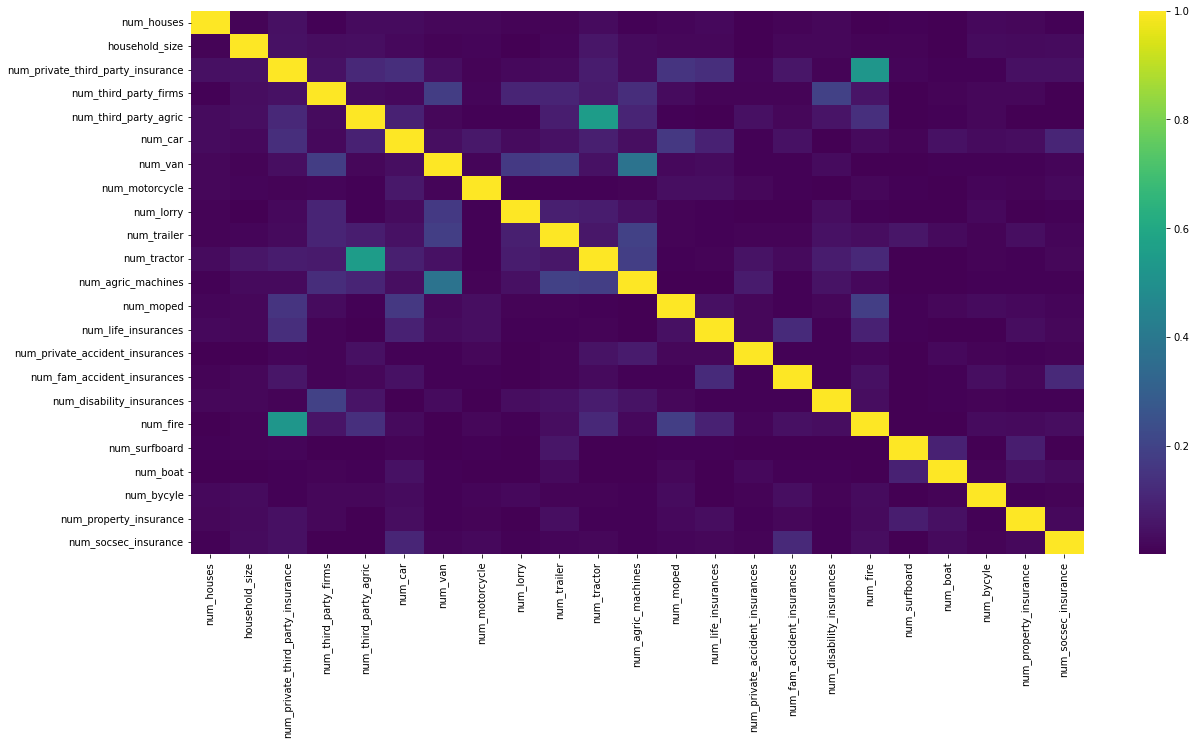

In [36]:
corr = numeric_dataset.corr(method = 'pearson')
plt.figure(figsize = (20, 10))
sns.heatmap(corr.abs(), cmap ='viridis' )
plt.show()

In [37]:
## Let's make a list of the strongest correlations, putting the umbral in 0.5.
sorted_mat = corr.unstack().sort_values()

sorted_mat[sorted_mat > 0.5 ]

num_fire                           num_private_third_party_insurance    0.525261
num_private_third_party_insurance  num_fire                             0.525261
num_tractor                        num_third_party_agric                0.547175
num_third_party_agric              num_tractor                          0.547175
num_houses                         num_houses                           1.000000
num_agric_machines                 num_agric_machines                   1.000000
num_bycyle                         num_bycyle                           1.000000
household_size                     household_size                       1.000000
num_private_third_party_insurance  num_private_third_party_insurance    1.000000
num_third_party_firms              num_third_party_firms                1.000000
num_third_party_agric              num_third_party_agric                1.000000
num_car                            num_car                              1.000000
num_van                     

## Outlier Analysis
To carry out the outlier analysis, we will check the distribution and graphs of each numerical variable in detail to confirm if there are anomalous values and study what to do with them.

In [44]:
def plot_histograms(data, num_cols=None, figsize=(15, 15)):
    if num_cols is None:
        num_cols = int(math.ceil(math.sqrt(len(data.columns))))
    fig, axs = plt.subplots(nrows=num_cols, ncols=num_cols, figsize=figsize)
    for i, col in enumerate(data.columns):
        axs[i//num_cols, i%num_cols].hist(data[col])
        axs[i//num_cols, i%num_cols].set_title(col)
    plt.show()

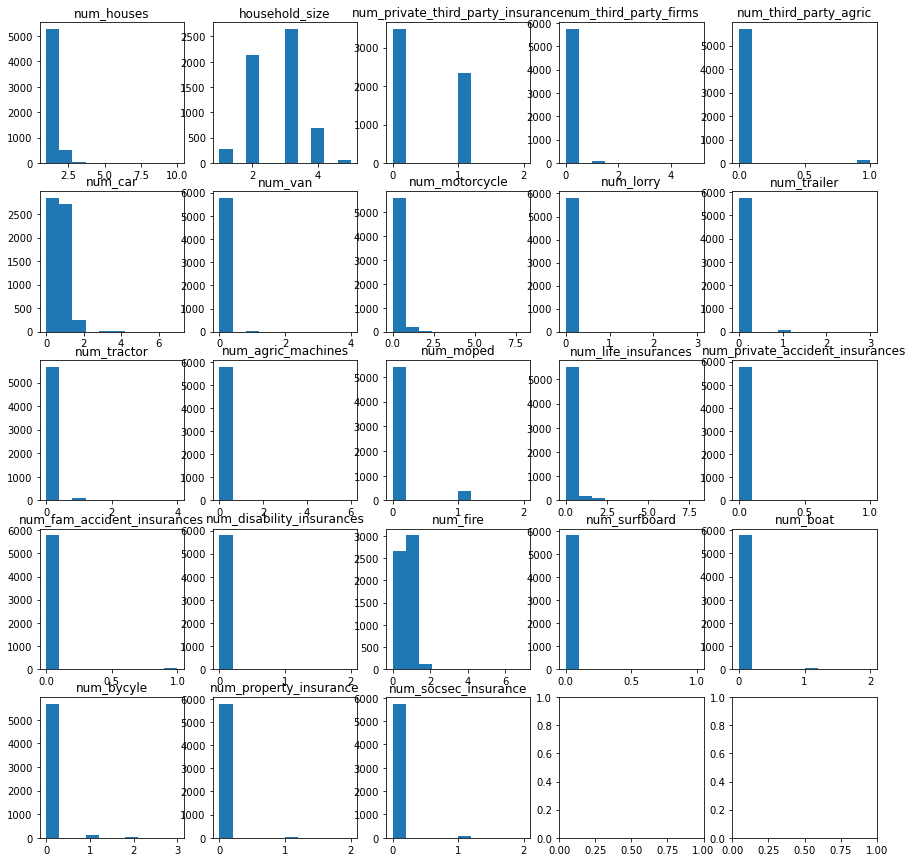

In [49]:
plot_histograms(numeric_dataset,5)

## Example of outliers
We choose several categories related to automobiles to see what is the distribution of the number of policies contracted and the existence of anomalous values.

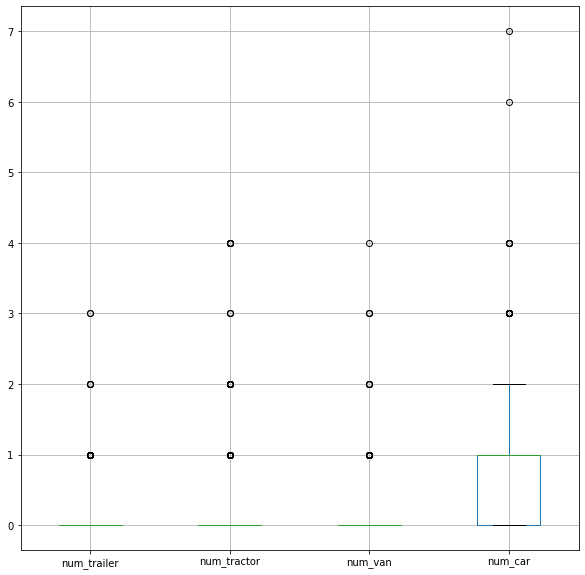

In [50]:
numeric_dataset.boxplot(['num_trailer', 'num_tractor', 'num_van', 'num_car'], figsize=(10,  10))
plt.show()

## Train Test Split


In [44]:
X_train = training_data.drop(85, axis=1).copy()
y_train = training_data.iloc[:,-1:]
X_test = testing_data
y_test = targets_data

## Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
lr_pred = lr.predict(X_test)

## Random ForestClassifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12072\3817811328.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


## KNeighbors Classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred=knn.predict(X_test)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [49]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3762
           1       0.60      0.01      0.02       238

    accuracy                           0.94      4000
   macro avg       0.77      0.51      0.50      4000
weighted avg       0.92      0.94      0.91      4000

[[3760    2]
 [ 235    3]]


In [53]:
print(classification_report(y_test, rfc_pred))
print(confusion_matrix(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      3762
           1       0.23      0.05      0.09       238

    accuracy                           0.93      4000
   macro avg       0.59      0.52      0.53      4000
weighted avg       0.90      0.93      0.91      4000

[[3718   44]
 [ 225   13]]


In [54]:
print(classification_report(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3762
           1       0.19      0.02      0.03       238

    accuracy                           0.94      4000
   macro avg       0.57      0.51      0.50      4000
weighted avg       0.90      0.94      0.91      4000

[[3745   17]
 [ 234    4]]


## Hyperparameter Optimization using Grid-Search-CV 

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# Build the grid search
rfc = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv = 5, verbose=1)
grid_results = grid.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [70]:
grid_results.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [73]:
rfc = RandomForestClassifier(criterion= 'gini',
 max_depth= 4,
 max_features='auto',
 n_estimators= 200)

rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [74]:
print(classification_report(y_test, rfc_pred))
print(confusion_matrix(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3762
           1       0.00      0.00      0.00       238

    accuracy                           0.94      4000
   macro avg       0.47      0.50      0.48      4000
weighted avg       0.88      0.94      0.91      4000

[[3762    0]
 [ 238    0]]
